In [160]:
#linear regression and modeling

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%config InlineBackend.figure_formats = ['svg']  # or svg
%matplotlib inline

# sns.set(context='notebook', style='whitegrid', font_scale=1.2)
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge, RidgeCV

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline

In [2]:
# LOG gross separated

#df6_log = np.log(df6["domestic_gross"])

NameError: name 'df6' is not defined

In [6]:
#df6_log.to_csv('/Users/hernantrujillo/Documents/Metis/NBM_Regression_Student-main/Movies_Project_Hernan/data_project/df6_log.csv')

NameError: name 'df6_log' is not defined

In [7]:
#df6_log = pd.read_csv('/Users/hernantrujillo/Documents/Metis/NBM_Regression_Student-main/Movies_Project_Hernan/data_project/df6_log.csv', index_col=0)     # log gross is included      
#df6_log.head(3)

,domestic_gross
title,
Avengers: Endgame,20.570549
The Lion King,20.113794
Toy Story 4,19.888643


In [8]:
#df6_log.shape

(580, 1)

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

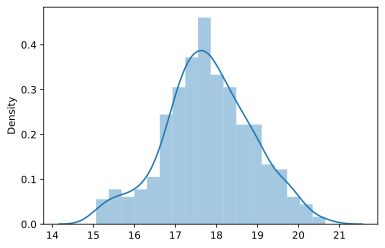

In [9]:
# log Gross 
# lifegross is not a normal distribution, it is right skewed -> use log to fix it if we need later

#sns.distplot(df6_log)


In [10]:
# LOG gross with df6 dataset 

#df6["domestic_gross_log"] = np.log(df6["domestic_gross"])
#df6.head()

NameError: name 'df6' is not defined

In [11]:
#df6.to_csv('/Users/hernantrujillo/Documents/Metis/NBM_Regression_Student-main/Movies_Project_Hernan/data_project/df6_log_total.csv') 

NameError: name 'df6' is not defined

In [2]:
df6 = pd.read_csv('/Users/hernantrujillo/Documents/Metis/NBM_Regression_Student-main/Movies_Project_Hernan/data_project/df6.csv', index_col=0)          
df6.head(3)

,budget,runtime,domestic_gross,widest_release,year,genre_comedy,genre_adventure,genre_thriller,genre_animation,genre_sci_fi,...,distributor_Twentieth Century Fox,distributor_Universal Pictures,distributor_Walt Disney Studios Motion Pictures,distributor_Warner Bros.,season_Spring,season_Summer,season_Winter,rating_PG,rating_PG_13,rating_R
title,,,,,,,,,,,,,,,,,,,,,
Avengers: Endgame,356000000,181,858373000,4662,2019,0,1,0,0,1,...,0,0,1,0,1,0,0,0,1,0
The Lion King,260000000,118,543638043,4802,2019,0,1,0,1,0,...,0,0,1,0,0,1,0,1,0,0
Toy Story 4,200000000,100,434038008,4575,2019,1,1,0,1,0,...,0,0,1,0,0,1,0,0,0,0


In [3]:
df6.info()

<class 'pandas.core.frame.DataFrame'>
Index: 580 entries, Avengers: Endgame to Horrible Bosses 2
Data columns (total 40 columns):
 #   Column                                           Non-Null Count  Dtype
---  ------                                           --------------  -----
 0   budget                                           580 non-null    int64
 1   runtime                                          580 non-null    int64
 2   domestic_gross                                   580 non-null    int64
 3   widest_release                                   580 non-null    int64
 4   year                                             580 non-null    int64
 5   genre_comedy                                     580 non-null    int64
 6   genre_adventure                                  580 non-null    int64
 7   genre_thriller                                   580 non-null    int64
 8   genre_animation                                  580 non-null    int64
 9   genre_sci_fi                 

In [4]:
df6.shape

(580, 40)

In [5]:
df6.columns

Index(['budget', 'runtime', 'domestic_gross', 'widest_release', 'year',
       'genre_comedy', 'genre_adventure', 'genre_thriller', 'genre_animation',
       'genre_sci_fi', 'genre_family', 'genre_horror', 'genre_crime',
       'genre_fantasy', 'genre_biography', 'genre_action', 'genre_romance',
       'genre_mystery', 'genre_drama', 'others_genre',
       'distributor_Focus Features', 'distributor_Fox Searchlight Pictures',
       'distributor_Lionsgate', 'distributor_Open Road Films (II)',
       'distributor_Other Dist', 'distributor_Paramount Pictures',
       'distributor_STX Entertainment', 'distributor_Screen Gems',
       'distributor_Sony Pictures Entertainment (SPE)',
       'distributor_The Weinstein Company',
       'distributor_Twentieth Century Fox', 'distributor_Universal Pictures',
       'distributor_Walt Disney Studios Motion Pictures',
       'distributor_Warner Bros.', 'season_Spring', 'season_Summer',
       'season_Winter', 'rating_PG', 'rating_PG_13', 'rating_R']

In [6]:
smaller_df6 = pd.read_csv('/Users/hernantrujillo/Documents/Metis/NBM_Regression_Student-main/Movies_Project_Hernan/data_project/smaller_df6.csv', index_col=0) 
smaller_df6

,domestic_gross,budget,runtime,widest_release,genre_adventure,genre_family,genre_drama,genre_sci_fi,distributor_Walt Disney Studios Motion Pictures,season_Spring,season_Summer,season_Winter,rating_PG,rating_PG_13
title,,,,,,,,,,,,,,
Avengers: Endgame,858373000,356000000,181,4662,1,0,1,1,1,1,0,0,0,1
The Lion King,543638043,260000000,118,4802,1,1,1,0,1,0,1,0,1,0
Toy Story 4,434038008,200000000,100,4575,1,1,0,0,1,0,1,0,0,0
Frozen II,477373578,150000000,103,4440,1,1,0,0,1,0,0,0,1,0
Captain Marvel,426829839,160000000,123,4310,1,0,0,1,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Danny Collins,5637066,10000000,106,739,0,0,1,0,0,1,0,0,0,0
90 Minutes in Heaven,4842699,5000000,121,899,0,0,1,0,0,0,0,0,0,1
The Water Diviner,4196641,22500000,111,385,0,0,1,0,0,1,0,0,0,0


In [8]:
smaller_df6.info()

<class 'pandas.core.frame.DataFrame'>
Index: 580 entries, Avengers: Endgame to Horrible Bosses 2
Data columns (total 14 columns):
 #   Column                                           Non-Null Count  Dtype
---  ------                                           --------------  -----
 0   domestic_gross                                   580 non-null    int64
 1   budget                                           580 non-null    int64
 2   runtime                                          580 non-null    int64
 3   widest_release                                   580 non-null    int64
 4   genre_adventure                                  580 non-null    int64
 5   genre_family                                     580 non-null    int64
 6   genre_drama                                      580 non-null    int64
 7   genre_sci_fi                                     580 non-null    int64
 8   distributor_Walt Disney Studios Motion Pictures  580 non-null    int64
 9   season_Spring                

In [9]:
smaller_df6.shape

(580, 14)

In [10]:
smaller_df6.columns

Index(['domestic_gross', 'budget', 'runtime', 'widest_release',
       'genre_adventure', 'genre_family', 'genre_drama', 'genre_sci_fi',
       'distributor_Walt Disney Studios Motion Pictures', 'season_Spring',
       'season_Summer', 'season_Winter', 'rating_PG', 'rating_PG_13'],
      dtype='object')

In [12]:
smaller_df6.describe()

,domestic_gross,budget,runtime,widest_release,genre_adventure,genre_family,genre_drama,genre_sci_fi,distributor_Walt Disney Studios Motion Pictures,season_Spring,season_Summer,season_Winter,rating_PG,rating_PG_13
count,5.800000e+02,5.800000e+02,580.000000,580.000000,580.000000,580.000000,580.000000,580.000000,580.000000,580.000000,580.000000,580.000000,580.000000,580.000000
mean,9.416689e+07,6.157474e+07,112.618966,3110.294828,0.341379,0.156897,0.458621,0.206897,0.075862,0.189655,0.236207,0.262069,0.168966,0.456897
std,1.197981e+08,6.135066e+07,17.377590,846.335070,0.474582,0.364017,0.498715,0.405430,0.265006,0.392367,0.425117,0.440140,0.375045,0.498569
min,3.496795e+06,1.000000e+05,79.000000,385.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.783945e+07,1.875000e+07,100.000000,2648.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5.232026e+07,3.800000e+07,110.000000,3169.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.081390e+08,9.000000e+07,123.000000,3754.750000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,9.366622e+08,3.560000e+08,181.000000,4802.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# 1. Baseline linear regression

#### 1.1 simple linear regression R^2: 0.5794

In [13]:
# Choose just the highest correlated columns with the target for our data
X = smaller_df6[['budget', 'runtime', 'widest_release',
       'genre_adventure', 'genre_family', 'genre_drama', 'genre_sci_fi',
       'distributor_Walt Disney Studios Motion Pictures', 'season_Spring',
       'season_Summer', 'season_Winter', 'rating_PG', 'rating_PG_13']] #.values.reshape(-1, 1)

In [14]:
# Choose the response variable (target)
y = smaller_df6['domestic_gross']

In [15]:
# Create an empty model
lr = LinearRegression()

In [16]:
# Fit the model 
lr.fit(X, y)

LinearRegression()

In [17]:
lr.score(X, y)

0.5794029250977051

In [18]:
print(lr.intercept_)
print(lr.coef_)

-156815307.0099703
[ 6.27543245e-01  5.68545655e+05  4.42382660e+04 -1.77337197e+07
 -1.47044697e+07 -2.88137230e+06  1.34695365e+07  1.28459208e+08
 -4.39203523e+06  9.39772261e+06  1.77822188e+07  3.82847717e+06
  2.57149111e+06]


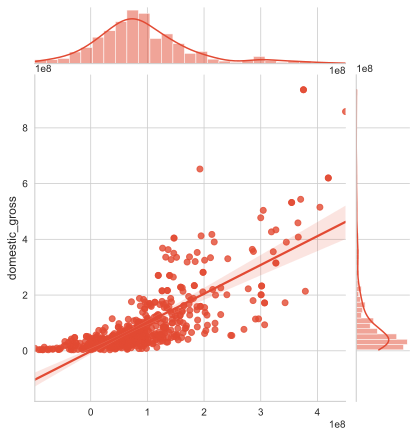

In [167]:
preds = lr.predict(X)  # generate predictions (on training data) using fit model

sns.jointplot(x=preds,y=y, kind='reg')  # a plot of actual vs. predicted values
plt.savefig("/Users/hernantrujillo/Documents/Metis/NBM_Regression_Student-main/Movies_Project_Hernan/base_lr_model.png", bbox_inches='tight')

#### 1.2 OLS

In [20]:
model = sm.OLS(y, sm.add_constant(X)) 
fit = model.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         domestic_gross   R-squared:                       0.579
Model:                            OLS   Adj. R-squared:                  0.570
Method:                 Least Squares   F-statistic:                     59.98
Date:                Thu, 08 Jul 2021   Prob (F-statistic):           2.04e-97
Time:                        17:50:31   Log-Likelihood:                -11360.
No. Observations:                 580   AIC:                         2.275e+04
Df Residuals:                     566   BIC:                         2.281e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
===================================================================================================================
                                                      coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------
const                                           -1.568e+08   3.11e+07     -5.048      0.000   -2.18e+08   -9.58e+07
budget                                              0.6275      0.113      5.555      0.000       0.406       0.849
runtime                                          5.685e+05   2.63e+05      2.162      0.031    5.21e+04    1.08e+06
widest_release                                   4.424e+04   5484.873      8.066      0.000    3.35e+04     5.5e+04
genre_adventure                                 -1.773e+07   9.98e+06     -1.778      0.076   -3.73e+07    1.86e+06
genre_family                                     -1.47e+07   1.81e+07     -0.815      0.416   -5.02e+07    2.08e+07
genre_drama                                     -2.881e+06   8.17e+06     -0.353      0.724   -1.89e+07    1.32e+07
genre_sci_fi                                     1.347e+07   9.52e+06      1.415      0.158   -5.22e+06    3.22e+07
distributor_Walt Disney Studios Motion Pictures  1.285e+08   1.54e+07      8.357      0.000    9.83e+07    1.59e+08
season_Spring                                   -4.392e+06   9.72e+06     -0.452      0.652   -2.35e+07    1.47e+07
season_Summer                                    9.398e+06   9.22e+06      1.020      0.308   -8.71e+06    2.75e+07
season_Winter                                    1.778e+07   8.75e+06      2.033      0.042    6.05e+05     3.5e+07
rating_PG                                        3.828e+06   1.73e+07      0.221      0.825   -3.02e+07    3.78e+07
rating_PG_13                                     2.571e+06   7.86e+06      0.327      0.744   -1.29e+07     1.8e+07
==============================================================================
Omnibus:                      282.496   Durbin-Watson:                   1.455
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2921.737
Skew:                           1.893   Prob(JB):                         0.00
Kurtosis:                      13.323   Cond. No.                     8.40e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.4e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### This OLS statsmodels table tells us:


- **log-likehood**:  want this to be relatively close to zero
- **std err**: smaller  values tend to mean a more precise coefficient estimate.
- **t & P t**:  if we assume the coefficient is zero, the probability of seeing our data (or something more extreme) is P>|t|.
- **Prob (F-statistic)**: want this to be small.(if small, it's safe to say that one of the coefficients is probably nonzero.)

- **condition number** : large -> strong multicollinearity or other numerical problems

#### 1.3 train test split on Simple Linear regreesion

In [21]:
X = smaller_df6[['budget', 'runtime', 'widest_release',
       'genre_adventure', 'genre_family', 'genre_drama', 'genre_sci_fi',
       'distributor_Walt Disney Studios Motion Pictures', 'season_Spring',
       'season_Summer', 'season_Winter', 'rating_PG', 'rating_PG_13']]#.values.reshape(-1, 1)

y = smaller_df6['domestic_gross']

In [22]:
# Split into train, val, and test

X, X_test, y, y_test = train_test_split(X, y, test_size=0.2, random_state=40) 
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25, random_state=40) 


In [23]:
print(X_train.shape)
print(X_test.shape)

(348, 13)
(116, 13)


In [24]:
# Fit a simple linear regression on training set

lr = LinearRegression()
lr.fit(X_train,y_train)
lr.score(X_train,y_train)

0.5654978042129453

In [25]:
# Score on validation set
lr.score(X_val,y_val)

0.5441750722702537

# 2. Feature Engineering

#### 2a. Polynomial : R^2: 0.60619
    - degree=3

In [26]:
X = smaller_df6[['budget', 'runtime', 'widest_release']] #.values.reshape(-1, 1)

y = smaller_df6['domestic_gross']

In [27]:
# train/val/test = 60/20/20

X, X_test, y, y_test = train_test_split(X, y, test_size=.2, random_state=40) 
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=.25, random_state=40) 

In [60]:
from sklearn.preprocessing import PolynomialFeatures
# this poly is same as the next 3 compasrions chart below

# Create polynomial features
poly = PolynomialFeatures(degree=3)
X_train_poly = poly.fit_transform(X_train)  # for train: fit + transform

# Apply polynomial transformation to val set
X_val_poly = poly.transform(X_val)          # for val: only transform

# Fit a model using polynomial features
lr_poly = LinearRegression()
lr_poly.fit(X_train_poly,y_train)

LinearRegression()

In [61]:
lr_poly.score(X_val_poly, y_val) 

0.6061967463016535

In [63]:
poly.get_feature_names()    

['1',
 'x0',
 'x1',
 'x2',
 'x3',
 'x4',
 'x5',
 'x6',
 'x7',
 'x8',
 'x9',
 'x10',
 'x11',
 'x12',
 'x0^2',
 'x0 x1',
 'x0 x2',
 'x0 x3',
 'x0 x4',
 'x0 x5',
 'x0 x6',
 'x0 x7',
 'x0 x8',
 'x0 x9',
 'x0 x10',
 'x0 x11',
 'x0 x12',
 'x1^2',
 'x1 x2',
 'x1 x3',
 'x1 x4',
 'x1 x5',
 'x1 x6',
 'x1 x7',
 'x1 x8',
 'x1 x9',
 'x1 x10',
 'x1 x11',
 'x1 x12',
 'x2^2',
 'x2 x3',
 'x2 x4',
 'x2 x5',
 'x2 x6',
 'x2 x7',
 'x2 x8',
 'x2 x9',
 'x2 x10',
 'x2 x11',
 'x2 x12',
 'x3^2',
 'x3 x4',
 'x3 x5',
 'x3 x6',
 'x3 x7',
 'x3 x8',
 'x3 x9',
 'x3 x10',
 'x3 x11',
 'x3 x12',
 'x4^2',
 'x4 x5',
 'x4 x6',
 'x4 x7',
 'x4 x8',
 'x4 x9',
 'x4 x10',
 'x4 x11',
 'x4 x12',
 'x5^2',
 'x5 x6',
 'x5 x7',
 'x5 x8',
 'x5 x9',
 'x5 x10',
 'x5 x11',
 'x5 x12',
 'x6^2',
 'x6 x7',
 'x6 x8',
 'x6 x9',
 'x6 x10',
 'x6 x11',
 'x6 x12',
 'x7^2',
 'x7 x8',
 'x7 x9',
 'x7 x10',
 'x7 x11',
 'x7 x12',
 'x8^2',
 'x8 x9',
 'x8 x10',
 'x8 x11',
 'x8 x12',
 'x9^2',
 'x9 x10',
 'x9 x11',
 'x9 x12',
 'x10^2',
 'x10 x11',
 'x10 x1

In [65]:
lr_poly.coef_

array([ 5.06380344e-04, -1.50049028e-06, -1.24601173e-10,  1.23278999e-11,
        2.04135857e-10, -2.21877422e-10,  7.94339505e-10,  3.82431828e-10,
       -1.83570751e-12,  7.35385734e-13,  2.77726822e-13,  2.35398664e-12,
       -1.62400426e-13,  2.80327858e-12,  2.11754888e-08, -8.59315668e-05,
       -2.28539038e-03,  1.73284649e-06, -6.81322465e-06, -8.75028721e-06,
        1.15236706e-05, -4.69110977e-06, -7.21027940e-07,  4.97108997e-07,
        3.68188783e-06, -5.84199509e-06,  1.00333174e-05,  1.16586625e-09,
        3.34786783e-08,  1.68851238e-11, -1.19264330e-11, -1.77370240e-11,
        5.28579917e-11, -1.73842884e-11,  1.47636894e-11,  1.10039305e-11,
       -4.47818129e-12, -9.68522082e-12,  4.78326544e-11,  2.20196237e-07,
        5.11434828e-10, -7.50177752e-11,  1.44011233e-10,  7.76034059e-10,
       -2.24369173e-10,  3.51129421e-10, -2.85049350e-10,  1.89340940e-10,
        8.36513522e-12,  7.87864683e-10,  1.79504145e-13,  2.51209391e-14,
        1.05556556e-14,  

In [77]:
poly

PolynomialFeatures()

In [192]:
#preds = lr_poly.predict(X)  # generate predictions (on training data) using fit model

#sns.jointplot(x=preds ,y=y, kind='reg')  # a plot of actual vs. predicted values
#plt.savefig("./charts/movies_num_ploy_jointplot.png") # split_and_validate(X, y):

### 2b. StandardScaler()
    - apply on step 3 below

# 3. Model Selection 

#### 3.1 Simple Validation Method: Train / Validation / Test

- compare : linear, Ridge, Poly

In [79]:
X = smaller_df6[['budget', 'runtime', 'widest_release',
       'genre_adventure', 'genre_family', 'genre_drama', 'genre_sci_fi',
       'distributor_Walt Disney Studios Motion Pictures', 'season_Spring',
       'season_Summer', 'season_Winter', 'rating_PG', 'rating_PG_13']]#.values.reshape(-1, 1)

y = smaller_df6['domestic_gross']

In [80]:
# train/val/test = 60/20/20

X, X_test, y, y_test = train_test_split(X, y, test_size=.2, random_state=40) 
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=.25, random_state=40) 

In [81]:
##set up the 3 models we're choosing from:

lr = LinearRegression()

#Feature scaling for train, val, and test so that we can run our ridge model on each
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train.values)
X_val_scaled = scaler.transform(X_val.values)
X_test_scaled = scaler.transform(X_test.values)

lr_reg = Ridge(alpha=1)  # TUNED this! 
                        ## tried but R^2 went down 0.01 from 0.533 to 0.523(when change alpha from 1 to  60)

#Feature transforms for train, val, and test so that we can run our poly model on each
poly = PolynomialFeatures(degree=3)  # simpler is better

X_train_poly = poly.fit_transform(X_train.values)
X_val_poly = poly.transform(X_val.values)
X_test_poly = poly.transform(X_test.values)

lr_poly = LinearRegression()

In [82]:
#lr_reg = Ridge(alpha=1)  
    
    # TUNED this! 
   ## tried but R^2 went down 0.006 from 0.544 to 0.538(when change alpha from 1 to  60)

#alpha=1: Ridge Regression val R^2: 0.544 (didn't improve my model at all. It's the same R^2)
#alpha=60: Ridge Regression val R^2: 0.538    

In [84]:
#validate

lr.fit(X_train, y_train)
print(f'Linear Regression val R^2: {lr.score(X_val, y_val):.3f}')

lr_reg.fit(X_train_scaled, y_train)
print(f'Ridge Regression val R^2: {lr_reg.score(X_val_scaled, y_val):.3f}')

lr_poly.fit(X_train_poly, y_train)
print(f'Degree 3 polynomial regression val R^2: {lr_poly.score(X_val_poly, y_val):.3f}')  

Linear Regression val R^2: 0.544
Ridge Regression val R^2: 0.544
Degree 3 polynomial regression val R^2: 0.606


#### Degree 3 polynomial regression did the best 


In [85]:
# NEW GOAL:  fit ridge to poly

#Feature transforms for train, val, and test so that we can run our poly model on each
poly = PolynomialFeatures(degree=2)  # simpler is better

X_train_poly = poly.fit_transform(X_train.values)
X_val_poly = poly.transform(X_val.values)
X_test_poly = poly.transform(X_test.values)


##
lr_poly = LinearRegression()

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train.values)
X_val_scaled = scaler.transform(X_val.values)
X_test_scaled = scaler.transform(X_test.values)

lr_reg = Ridge(alpha=1) 

lr_poly.fit(X_train_poly, y_train)

LinearRegression()

In [86]:
# TAQ
# we will see
lr_poly.score(X_test_poly, y_test)

0.6440237888226462

In [87]:
lr.fit(X,y)
print(f'Linear Regression test R^2: {lr.score(X_test, y_test):.3f}')

Linear Regression test R^2: 0.613


#### 3.2 Cross-Validation / Test

In [88]:
lr = LinearRegression()

cross_val_score(lr, X, y, # estimator, features, target
                cv=5, # number of folds 
                scoring='r2') # scoring metric

array([0.50733074, 0.58589401, 0.51957305, 0.56335912, 0.36822261])

In [89]:
kf = KFold(n_splits=5, shuffle=True, random_state = 71)
cross_val_score(lr, X, y, cv=kf, scoring='r2')

array([0.46588291, 0.533326  , 0.58062343, 0.47894787, 0.45164902])

In [90]:
kf = KFold(n_splits=5, shuffle=True, random_state = 1000)

print(np.mean(cross_val_score(lr, X, y, cv=kf, scoring='r2')))  
print(np.mean(cross_val_score(lr_reg, X, y, cv=kf, scoring='r2')))# may change

0.4961495361530148
0.49889941354914036


/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.13039e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.47206e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.55609e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.00111e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.76342e-18): result may not be accurate

In [91]:
# not working that well since df size is not a small  ?

# 4. Linear, RidgeCV, LassoCV

In [103]:
X = smaller_df6[['budget', 'runtime', 'widest_release',
       'genre_adventure', 'genre_family', 'genre_drama', 'genre_sci_fi',
       'distributor_Walt Disney Studios Motion Pictures', 'season_Spring',
       'season_Summer', 'season_Winter', 'rating_PG', 'rating_PG_13']]#.values.reshape(-1, 1)

y = smaller_df6['domestic_gross']

In [104]:
X, X_test, y, y_test = train_test_split(X ,y, test_size=.2, random_state=40) 
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=.25, random_state=40) 

#### 4.1. Linear

In [105]:
lr = LinearRegression()
lr.fit(X_train,y_train)
lr.score(X_train,y_train)

0.5654978042129453

In [106]:
lr.score(X_val,y_val)  # no overfitting  

0.5441750722702537

In [107]:
lr.score(X_test,y_test)

0.6122456995524901

In [108]:
lr.coef_

array([ 4.30299644e-01,  5.43907900e+05,  5.32003148e+04, -5.86511236e+06,
       -1.21934657e+07, -3.90889469e+06,  7.52958139e+06,  1.28697809e+08,
       -7.62279309e+06, -3.80352239e+05,  1.34869763e+07, -9.18469294e+04,
       -1.53014793e+06])

In [109]:
preds = lr.predict(X)
preds 

array([ 6.56327448e+07,  7.68984833e+07,  9.82409624e+07, -2.59430026e+07,
        2.74286951e+07, -3.45138680e+07,  7.25289543e+07,  5.34847578e+07,
        3.48227844e+07,  3.85167351e+07,  1.47362643e+08,  1.43700111e+08,
        5.46163119e+07,  3.39963271e+07,  1.87891552e+08,  1.22275198e+08,
        2.47167298e+08, -2.83232095e+07,  1.23479302e+08,  9.72667439e+07,
        2.90768685e+08,  2.05919031e+08,  4.55643783e+07,  1.46568299e+08,
        4.66653993e+07,  1.00246984e+08,  2.38495275e+07, -5.30562454e+07,
        1.02771980e+08,  3.26717002e+08, -3.23444601e+06,  4.85517558e+07,
        1.00934322e+08,  7.07194675e+07, -1.70666472e+06,  2.12766879e+07,
        1.41339829e+08,  1.11979004e+08,  2.99989866e+08,  2.56523013e+07,
       -1.90112230e+07,  4.81629356e+07,  1.18523347e+08,  6.64554780e+07,
        1.10878975e+07,  3.18916933e+08, -5.97512320e+07,  2.28992596e+07,
        4.31867635e+07,  1.15660558e+08,  1.74717926e+08,  4.06508675e+07,
        1.68905224e+08,  

In [110]:
#y

In [111]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

rmse = mean_squared_error(y, preds, squared=False)
mae = mean_absolute_error(y, preds)

print(rmse)
print(mae)

77296985.08071157
50775217.95247142


#### 4.2 RidgeCV

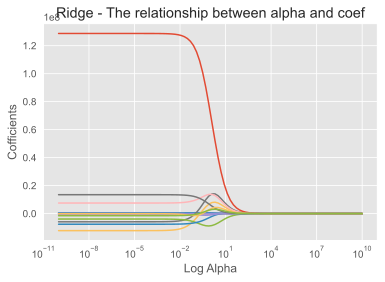

<Figure size 432x288 with 0 Axes>

In [169]:

#tuning on alpha

alphas = 10**np.linspace(-10,10,100)
ridge_cofficients = []
 
for alpha in alphas:
    ridge = Ridge(alpha = alpha, normalize=True)  #StandardScaler()
    ridge.fit(X_train, y_train)
    ridge_cofficients.append(ridge.coef_)
     
#plot for the relationship between alpha and coef  
#plt.rcParams['font.sans-serif'] = ['Microsoft YaHei']
#plt.rcParams['axes.unicode_minus'] = False

plt.style.use('ggplot')
plt.plot(alphas, ridge_cofficients)
plt.xscale('log')
plt.axis('tight')
plt.title(r'Ridge - The relationship between alpha and coef')
plt.xlabel('Log Alpha')
plt.ylabel('Cofficients')
plt.show()
plt.savefig("/Users/hernantrujillo/Documents/Metis/NBM_Regression_Student-main/Movies_Project_Hernan/ridge_cv_alpha.png", bbox_inches='tight');

#ridge CV
ridge_cv = RidgeCV(alphas = alphas, normalize=True, cv = 10)
ridge_cv.fit(X_train, y_train)
# getting the best lambda: ridge_best_alpha = ridge_cv.alpha_
ridge_best_alpha = ridge_cv.alpha_ #the best lambda 
# modeling based on th best lambda 
ridge = Ridge(alpha = ridge_best_alpha,normalize = True)
ridge.fit(X_train,y_train)
ridge_predict = ridge.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test,ridge_predict))
mae = mean_absolute_error(y_test,ridge_predict)


In [116]:
ridge.score(X_train,y_train)

0.5510750250168976

In [117]:
ridge.score(X_val,y_val) 

0.5273368736617015

In [118]:
rmse

84436245.5900072

In [119]:
mae

49560402.49957842

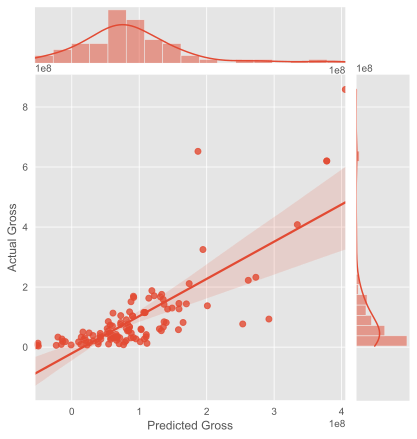

In [170]:
# generate predictions (on training data) using fit model


sns.jointplot(x=ridge_predict,y=y_test, kind='reg')  
plt.xlabel('Predicted Gross')
plt.ylabel('Actual Gross')
plt.savefig("/Users/hernantrujillo/Documents/Metis/NBM_Regression_Student-main/Movies_Project_Hernan/ridge_jointplot.png", bbox_inches='tight')

#### 4.3 LassoCV

In [181]:
lasso_cv = LassoCV(alphas = alphas, normalize=True, cv = 10, max_iter=10000)
lasso_cv.fit(X_train,y_train)

lasso_best_alpha = lasso_cv.alpha_
lasso_best_alpha

lasso = Lasso(alpha = lasso_best_alpha, normalize=True, max_iter=10000)
lasso.fit(X_train,y_train)
 
lasso_predict = lasso.predict(X_test) 
rmse = np.sqrt(mean_squared_error(y_test,lasso_predict))
mae = mean_absolute_error(y_test,ridge_predict)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.0048120413735424e+16, tolerance: 414265863838105.44
  model = cd_fast.enet_coordinate_descent_gram(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9.815510140675328e+16, tolerance: 414265863838105.44
  model = cd_fast.enet_coordinate_descent_gram(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.4116033114499584e+16, tolerance: 414265863838105.44
  model = cd_fast.enet_coordinate_descent_gram(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_d

In [174]:
lasso.score(X_train,y_train)

0.5582471427612234

In [175]:
lasso_best_alpha

225701.9719633917

In [176]:
lasso.score(X_val,y_val) 

0.5288649856508829

In [177]:
rmse

83885070.50970961

In [178]:
mae

49560402.49957842

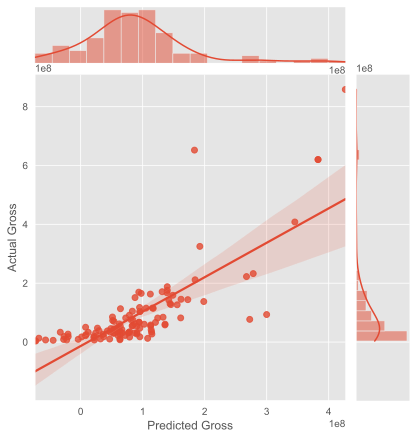

In [171]:
# generate predictions (on training data) using fit model
# a plot of actual vs. predicted values


sns.jointplot(x=lasso_predict,y=y_test, kind='reg')
plt.xlabel('Predicted Gross')
plt.ylabel('Actual Gross')
plt.savefig("/Users/hernantrujillo/Documents/Metis/NBM_Regression_Student-main/Movies_Project_Hernan/lasso_jointplot.png", bbox_inches='tight')

# 8. check model residual 

#### Ridge model Residuals

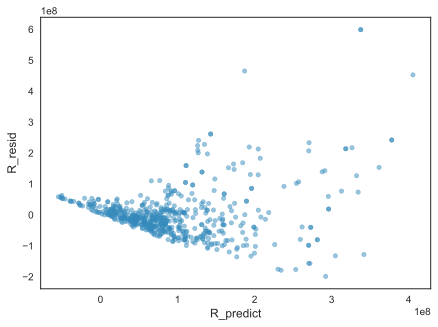

In [180]:
smaller_df6['R_predict']= ridge.predict(X)
smaller_df6['R_resid']= y- (smaller_df6.R_predict)
with sns.axes_style('white'):
    plot = smaller_df6.plot(
        kind='scatter', x='R_predict', y='R_resid', alpha=0.5, figsize=(7,5))

#### Lasso model Residuals

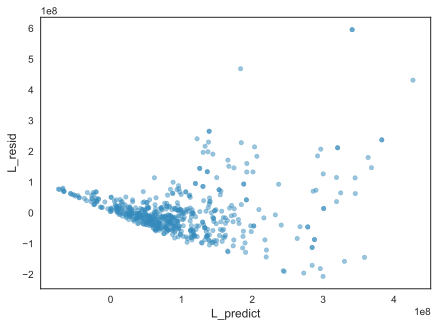

In [179]:
smaller_df6['L_predict']= lasso.predict(X)
smaller_df6['L_resid']= y- (smaller_df6.L_predict)
with sns.axes_style('white'):
    plot = smaller_df6.plot(
        kind='scatter', x='L_predict', y='L_resid', alpha=0.5, figsize=(7,5)) 

In [182]:
import statsmodels.api as sm
import scipy.stats as stats

In [187]:
X = smaller_df6[['budget', 'runtime', 'widest_release',
       'genre_adventure', 'genre_family', 'genre_drama', 'genre_sci_fi',
       'distributor_Walt Disney Studios Motion Pictures', 'season_Spring',
       'season_Summer', 'season_Winter', 'rating_PG', 'rating_PG_13']]#.values.reshape(-1, 1)

y = smaller_df6['domestic_gross']

In [188]:
def diagnostic_plots(y_pred, y_true, resid):
    fig, axes = plt.subplots(1, 3, figsize=(10, 4))

    g1 = sns.regplot(x=y_pred, y=y_true, ci=False, fit_reg=False, line_kws={'color': 'blue'}, ax=axes[0], scatter_kws={'s': 5})
    g1.set_xlabel('Predicted Target')
    g1.set_ylabel('True Target')
    g1.plot(y_true, y_true, '--', color='gray')

    g2 = sns.regplot(x=y_pred, y=resid, lowess=True, ax=axes[1], line_kws={'color': 'red'}, scatter_kws={'s': 5})
    g2.set_xlabel('Predicted Target')
    g2.set_ylabel('Residual')
    g2.axhline(y=0, color='gray', linestyle='--')

    stats.probplot(resid, dist="norm", plot=axes[2])

    fig.suptitle('Diagnostic Plots');
    fig.tight_layout();

In [189]:
#Create the model
model = sm.OLS(y, sm.add_constant(X)) 
#Fit
fit = model.fit()
#Print out summary
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         domestic_gross   R-squared:                       0.579
Model:                            OLS   Adj. R-squared:                  0.570
Method:                 Least Squares   F-statistic:                     59.98
Date:                Fri, 09 Jul 2021   Prob (F-statistic):           2.04e-97
Time:                        04:56:10   Log-Likelihood:                -11360.
No. Observations:                 580   AIC:                         2.275e+04
Df Residuals:                     566   BIC:                         2.281e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
===================================================================================================================
                                                      coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------
const                                           -1.568e+08   3.11e+07     -5.048      0.000   -2.18e+08   -9.58e+07
budget                                              0.6275      0.113      5.555      0.000       0.406       0.849
runtime                                          5.685e+05   2.63e+05      2.162      0.031    5.21e+04    1.08e+06
widest_release                                   4.424e+04   5484.873      8.066      0.000    3.35e+04     5.5e+04
genre_adventure                                 -1.773e+07   9.98e+06     -1.778      0.076   -3.73e+07    1.86e+06
genre_family                                     -1.47e+07   1.81e+07     -0.815      0.416   -5.02e+07    2.08e+07
genre_drama                                     -2.881e+06   8.17e+06     -0.353      0.724   -1.89e+07    1.32e+07
genre_sci_fi                                     1.347e+07   9.52e+06      1.415      0.158   -5.22e+06    3.22e+07
distributor_Walt Disney Studios Motion Pictures  1.285e+08   1.54e+07      8.357      0.000    9.83e+07    1.59e+08
season_Spring                                   -4.392e+06   9.72e+06     -0.452      0.652   -2.35e+07    1.47e+07
season_Summer                                    9.398e+06   9.22e+06      1.020      0.308   -8.71e+06    2.75e+07
season_Winter                                    1.778e+07   8.75e+06      2.033      0.042    6.05e+05     3.5e+07
rating_PG                                        3.828e+06   1.73e+07      0.221      0.825   -3.02e+07    3.78e+07
rating_PG_13                                     2.571e+06   7.86e+06      0.327      0.744   -1.29e+07     1.8e+07
==============================================================================
Omnibus:                      282.496   Durbin-Watson:                   1.455
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2921.737
Skew:                           1.893   Prob(JB):                         0.00
Kurtosis:                      13.323   Cond. No.                     8.40e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.4e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

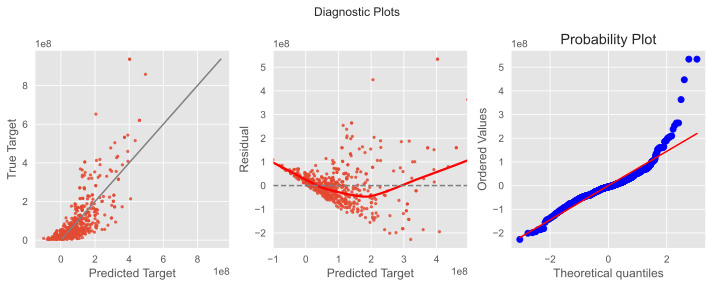

In [190]:
diagnostic_plots(fit.fittedvalues, y, fit.resid)
plt.savefig("/Users/hernantrujillo/Documents/Metis/NBM_Regression_Student-main/Movies_Project_Hernan/diagnostic_plots.png", bbox_inches='tight')